In [1]:
from datetime import date
today = date.today()
print("Last Updated Date:", today.strftime("%d %B %Y"))

Last Updated Date: 23 May 2021


<br>[Pandas](#Pandas)
<br>[Pandas Cheat Sheet](#Pandas_Cheat_Sheet)
<br>[Series](#Series)
<br>[DataFrames](#DataFrames)
<br>[Missing Data](#Missing_Data)
<br>[Groupby](#Groupby)
<br>[Operations](#Operations)
<br>[Data Input and Output](#Data_Input_and_Output)
<br>[Using Pandas for Data Visualization](#Using_Pandas_for_Data_Visualization)
<br>[Reading Real World Data Files](#Reading_Real_World_Data_Files)
<br>[Data Manipulation with Pandas](#Data_Manipulation_with_Pandas)

In [1]:
                                            # Questions
# To see all the libraries in the Module
# To see the Help Section of a particular command
# To see the present working directory
# To load files into a data frame
# To convert data frame into numpy Matrix
# Min of a particular column in Data Frame
# Max of a particular column in Data Frame
# Boolean Masking in Pandas

# <a id='Pandas'></a>Pandas
* Pandas is a Data Analysis and Manipulation Library, it offers data structures and operations for manipulating numerical tables and time series
 - We can read and write differnt formats of file like CSV, JSON, EXCEL, HTML, etc.
 - We can summarize the data.
 - We can filter and modify the data based on multiple conditions.
 - We can merge multiple files
* Pandas built on NumPy just like MatPlotLib
* NumPy has an array of data organized by an index which is very much like a python list except that NumPy support element by element operations
* Series
* DataFrames
* Missing Data
* GroupBy
* Merging, Joining and Concatenating
* Operations
* Data Input and Output

# <a id='Pandas_Cheat_Sheet'></a>Pandas Cheat Sheet

In [ ]:
# Practice Session
import pandas as pd
%pwd   - Magic Commands (works inline with Jupyter Notebooks) - Unix command
df = pd.read_csv('salaries.csv')
print(df)
df['Salary']
df['Salary'].describe()
df[['Name','Salary','Age']]
df.as_matrix()
df[df['Age']>40]
df['Salary'].min()
df['Salary'].max()

In [1]:
import numpy as np
import pandas as pd

In [ ]:
# To display maximum number of row. It's an environement variable
pd.set_option('display.max_rows', 500)

In [7]:
df = pd.read_csv('./Media/NYCTaxiFares.csv')

# <a id='Series'></a>Series
* Series is the first main data type and its the Series object.
* A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). What differentiates the NumPy array from a Series, is that a Series can have __axis labels, meaning it can be indexed by a label, instead of just a number location. It also doesn't need to hold numeric data, it can hold any arbitrary Python Object__

## Creating a Series
* You can convert a list, numpy array, or dictionary to a Series:

In [8]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

### Using List

In [9]:
pd.Series(data=my_list) # or pd.Series(my_list)

0    10
1    20
2    30
dtype: int64

In [10]:
pd.Series(data=my_list,index=labels)

a    10
b    20
c    30
dtype: int64

In [11]:
pd.Series(my_list,labels)

a    10
b    20
c    30
dtype: int64

### Using NumPy Arrays

In [12]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int32

In [13]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int32

### Using Dictionaries

In [14]:
pd.Series(d)     # For dictionaries its keys will be tagged as indexes

a    10
b    20
c    30
dtype: int64

### Data in a Series
* A pandas Series can hold a variety of object types:

In [15]:
pd.Series(data=labels)

0    a
1    b
2    c
dtype: object

In [16]:
# Even functions (although unlikely that you will use this)
pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

### Using an Index
* The key to using a Series is understanding its index. Pandas makes use of these index names or numbers by allowing for fast look ups of information (works like a hash table or dictionary).
* Let's see some examples of how to grab information from a Series. Let us create two sereis, ser1 and ser2:

In [17]:
ser1 = pd.Series(data=[1,2,3,4],index=['India','USA','Japan','USSR'])                    

In [18]:
ser1

India    1
USA      2
Japan    3
USSR     4
dtype: int64

In [19]:
ser2 = pd.Series([1,2,5,4],index = ['India', 'Germany','Italy', 'Japan'])                                   

In [20]:
ser2

India      1
Germany    2
Italy      5
Japan      4
dtype: int64

In [21]:
ser1['India']

1

Operations are then also done based off of index:

In [22]:
ser1 + ser2         # NaN mean Not a Number

Germany    NaN
India      2.0
Italy      NaN
Japan      7.0
USA        NaN
USSR       NaN
dtype: float64

# <a id='DataFrames'></a>DataFrames
* DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index.

In [2]:
from numpy.random import randn
np.random.seed(101)

In [6]:
df = pd.DataFrame(randn(5,4))
df     # df.head() gives the same output

,0,1,2,3
0,0.386030,2.084019,-0.376519,0.230336
1,0.681209,1.035125,-0.031160,1.939932
2,-1.005187,-0.741790,0.187125,-0.732845
3,-1.382920,1.482495,0.961458,-2.141212
4,0.992573,1.192241,-1.046780,1.292765


In [7]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split())
df     # df.head() gives the same output

,0,1,2,3
A,-1.467514,-0.494095,-0.162535,0.485809
B,0.392489,0.221491,-0.855196,1.541990
C,0.666319,-0.538235,-0.568581,1.407338
D,0.641806,-0.905100,-0.391157,1.028293
E,-1.972605,-0.866885,0.720788,-1.223082


In [8]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())
df     # df.head() gives the same output

,W,X,Y,Z
A,1.606780,-1.115710,-1.385379,-1.329660
B,0.041460,-0.411055,-0.771329,0.110477
C,-0.804652,0.253548,0.649148,0.358941
D,-1.080471,0.902398,0.161781,0.833029
E,0.975720,-0.388239,0.783316,-0.708954


## Selection and Indexing
* Let's learn the various methods to grab data from a DataFrame
* In Pandas (__in NumPy it will be opposite__),
    - axis='index' (or axis=0 for 'Row' selection)
    - axis='columns' (or axis=1 for 'Column selection)

<br> <b> VIMP </b>
* __Use axis='index' (instead of axis=0) or axis='columns' (instead of axis=1)__

In [25]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [26]:
# Pass a list of column names
df[['W','Z']]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [27]:
# SQL Syntax (NOT RECOMMENDED!)
df.W

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

__DataFrame Columns are just Series__

In [28]:
type(df['W'])

pandas.core.series.Series

## Creating a new column:

In [29]:
df['new'] = df['W'] + df['Y']

In [30]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


## Removing Columns

In [31]:
df.drop('new',axis='columns') # df.drop('new',axis=1)        

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [32]:
# Not inplace unless specified!
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [33]:
df.drop('new',axis='columns',inplace=True) # df.drop('new',axis=1,inplace=True)

In [34]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


__Can also drop rows this way:__

In [35]:
df.drop('E',axis='index')    # df.drop('E',axis=0)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


## Selecting Rows
* .loc[row,column] - row is index label, column is column label
* .iloc[row,column] - row is index integer, column is column integer

In [37]:
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

__Or select based off of position instead of label__

In [38]:
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

In [ ]:
df.iloc[df['age'].idxmin()]['marital']    # .idxmin() - index of a minimum value of a given column

### Selecting subset of rows and columns
* .loc[row,column] - row is index label, column is column label
* .iloc[row,column] - row is index integer, column is column integer

In [40]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [41]:
df.loc['B','Y']

-0.8480769834036315

In [ ]:
df.loc['A':'B','W':'Y']   # Pandas slicing behave little bit different. 'B' and 'Y' are included     VIMP

In [42]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


## Conditional Selection
* An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [9]:
df

,W,X,Y,Z
A,1.606780,-1.115710,-1.385379,-1.329660
B,0.041460,-0.411055,-0.771329,0.110477
C,-0.804652,0.253548,0.649148,0.358941
D,-1.080471,0.902398,0.161781,0.833029
E,0.975720,-0.388239,0.783316,-0.708954


In [10]:
df>0

,W,X,Y,Z
A,True,False,False,False
B,True,False,False,True
C,False,True,True,True
D,False,True,True,True
E,True,False,True,False


In [11]:
df[df>0]

,W,X,Y,Z
A,1.60678,NaN,NaN,NaN
B,0.04146,NaN,NaN,0.110477
C,NaN,0.253548,0.649148,0.358941
D,NaN,0.902398,0.161781,0.833029
E,0.97572,NaN,0.783316,NaN


In [12]:
df['W']>0

A     True
B     True
C    False
D    False
E     True
Name: W, dtype: bool

In [13]:
df[df['W']>0]

,W,X,Y,Z
A,1.60678,-1.115710,-1.385379,-1.329660
B,0.04146,-0.411055,-0.771329,0.110477
E,0.97572,-0.388239,0.783316,-0.708954


In [48]:
df[df['W']>0]['Y']

A    0.907969
B   -0.848077
D   -0.933237
E    2.605967
Name: Y, dtype: float64

In [49]:
df[df['W']>0][['Y','X']]

,Y,X
A,0.907969,0.628133
B,-0.848077,-0.319318
D,-0.933237,-0.758872
E,2.605967,1.978757


For two conditions you can use __| (similar to 'or' in NumPy) and & (similar to 'and' in NumPy)__ with parenthesis:
* 'and' , 'or' will not work in Pandas        __VIMP__

In [50]:
df[(df['W']>0) & (df['Y'] > 1)]

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


## More Index Details

Some more features of indexing and resetting the index or setting it something else. We'll also talk about index hierarchy!

In [51]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [14]:
# Reset to default 0,1...n index
df.reset_index()                # VIMP

,index,W,X,Y,Z
0,A,1.606780,-1.115710,-1.385379,-1.329660
1,B,0.041460,-0.411055,-0.771329,0.110477
2,C,-0.804652,0.253548,0.649148,0.358941
3,D,-1.080471,0.902398,0.161781,0.833029
4,E,0.975720,-0.388239,0.783316,-0.708954


In [53]:
newind = 'CA NY WY OR CO'.split()

In [54]:
df['States'] = newind

In [55]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [56]:
df.set_index('States')         # VIMP

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


In [57]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [58]:
df.set_index('States',inplace=True)

In [59]:
df

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


## DataFrame Summaries
* There are a couple of ways to obtain summary data on DataFrames
* __df.describe()__ provides summary statistics on all numerical columns
* __df.info__ and __df.dtypes__ displays the data type of all columns
* __df.head()__ and __df.tail()__

In [60]:
df.describe()

,W,X,Y,Z
count,5.000000,5.000000,5.000000,5.000000
mean,0.343858,0.453764,0.452287,0.431871
std,1.681131,1.061385,1.454516,0.594708
min,-2.018168,-0.758872,-0.933237,-0.589001
25%,0.188695,-0.319318,-0.848077,0.503826
50%,0.190794,0.628133,0.528813,0.605965
75%,0.651118,0.740122,0.907969,0.683509
max,2.706850,1.978757,2.605967,0.955057


In [61]:
df.dtypes

W    float64
X    float64
Y    float64
Z    float64
dtype: object

In [62]:
df.info()   # Shows the metadata of columns

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, CA to CO
Data columns (total 4 columns):
W    5 non-null float64
X    5 non-null float64
Y    5 non-null float64
Z    5 non-null float64
dtypes: float64(4)
memory usage: 200.0+ bytes


In [63]:
df.columns  # Shows the list of columns

Index(['W', 'X', 'Y', 'Z'], dtype='object')

In [64]:
df.head()    # Shows the top 5 records
df.tail()    # Shows the bottom 5 records

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


# <a id='Missing_Data'></a>Missing Data
* Let's show a few convenient methods to deal with Missing Data in pandas:

In [65]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [66]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [67]:
df.dropna()  # Remove NaN values

,A,B,C
0,1.0,5.0,1


In [68]:
df.dropna(axis='columns') # df.dropna(axis=1)

,C
0,1
1,2
2,3


In [69]:
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [70]:
df.fillna(value='FILL VALUE')

,A,B,C
0,1,5,1
1,2,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [71]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [0]:
# check the null values in the data
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# <a id='Groupby'></a>Groupby
* The groupby method allows you to group rows of data together and call aggregate functions

In [72]:
import pandas as pd
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [73]:
df = pd.DataFrame(data)

In [74]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


<strong>Now you can use the .groupby() method to group rows together based off of a column name.<br>For instance let's group based off of Company. This will create a DataFrameGroupBy object:</strong>

In [75]:
df.groupby('Company')      # df.groupby(['col1', 'col2']) - To group by on multiple columns

You can save this object as a new variable:

In [76]:
by_comp = df.groupby("Company")

And then call aggregate methods off the object:

In [77]:
by_comp.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [78]:
df.groupby('Company').mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


More examples of aggregate methods:

In [79]:
by_comp.std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [80]:
by_comp.min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [81]:
by_comp.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [82]:
by_comp.count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [83]:
by_comp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [84]:
by_comp.describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [85]:
by_comp.describe().transpose()['GOOG']

Sales  count      2.000000
       mean     160.000000
       std       56.568542
       min      120.000000
       25%      140.000000
       50%      160.000000
       75%      180.000000
       max      200.000000
Name: GOOG, dtype: float64

In [86]:
by_comp.describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [87]:
by_comp.describe().transpose()['GOOG']

Sales  count      2.000000
       mean     160.000000
       std       56.568542
       min      120.000000
       25%      140.000000
       50%      160.000000
       75%      180.000000
       max      200.000000
Name: GOOG, dtype: float64

# <a id='Operations'></a>Operations
* There are lots useful operations with pandas

In [88]:
import pandas as pd
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


## Conversion of data types

In [ ]:
df.astype()

## Info on Unique Values

In [89]:
df['col2'].unique()     # Unique Values in a NumPy array

array([444, 555, 666], dtype=int64)

In [90]:
df['col2'].nunique()       # Number of Unique Values

3

In [91]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

## Selecting Data

In [92]:
#Select from DataFrame using criteria from multiple columns
newdf = df[(df['col1']>2) & (df['col2']==444)]

In [93]:
newdf

,col1,col2,col3
3,4,444,xyz


In [94]:
(df['col1']>2) & (df['col2']==444)

0    False
1    False
2    False
3     True
dtype: bool

## Applying Functions

In [95]:
def times2(x):
    return x*2

In [96]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [97]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [ ]:
df['marital code'] = df['marital code'].apply(lambda x: x[0]) # AI_ML/PYTORCH_NOTEBOOKS/00-Crash-Course-Topics/01-Crash-Course-Pandas/07-Pandas-Exercises.ipynb
df

In [99]:
df['col1'].sum()

10

## Permanently Removing a Column

In [100]:
del df['col1']

In [101]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


## Get column and index names:

In [102]:
df.columns

Index(['col2', 'col3'], dtype='object')

In [103]:
df.index

RangeIndex(start=0, stop=4, step=1)

## Sorting and Ordering a DataFrame:

In [104]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [105]:
df.sort_values(by='col2') #inplace=False by default

,col2,col3
0,444,abc
3,444,xyz
1,555,def
2,666,ghi


## Fetching Substrings using .str on Series data. Output of .str is vectorized (array) string
<br>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html

In [ ]:
df['pickup_datetime'].str[:19]

# <a id='Data_Input_and_Output'></a>Data Input and Output
* This notebook is the reference code for getting input and output, pandas can read a variety of file types using its pd.read_ methods. Let's take a look at the most common data types:

## CSV
* Comma Separated Values files are text files that use commas as field delimeters.
* Unless you're running the virtual environment included with the course, you may need to install __xlrd__ and __openpyxl__
* In your terminal/command prompt run:
    * conda install xlrd
    * conda install openpyxl
* Then restart Jupyter Notebook. (or use pip install if you aren't using the Anaconda Distribution)

### CSV Input

In [107]:
df = pd.read_csv('C:\\Users\\sande\\AI_ML\\Media\\example.csv')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


### CSV Output

In [108]:
df.to_csv('example.csv',index=False)

## Excel
* Pandas can read and write MS Excel files. However, this only imports data, not formulas or images. A file that contains images or macros may cause the __.read_excel()__ method to crash

### Excel Input

In [109]:
pd.read_excel('C:\\Users\\sande\\AI_ML\\Media\\Excel_Sample.xlsx',sheet_name='Sheet1')

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


### Excel Output

In [110]:
df.to_excel('Excel_Sample.xlsx',sheet_name='Sheet1')

## HTML
* Pandas can read table tabs off of HTML.
* Unless you're running the virtual environment included with the course, you may need to install __lxml__, __htmllib5__, and __BeautifulSoup4__
* In your terminal/command prompt run:
    * conda install lxml
    * conda install html5lib
    * conda install beautifulsoup4
* Then restart Jupyter Notebook. (or use pip install if you aren't using the Anaconda Distribution)

### HTML Input
* Pandas read_html function will read tables off of a webpage and return a list of DataFrame objects:

In [111]:
df = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')

In [112]:
df[0].head(10)

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
1,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
2,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"
3,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019"
4,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017"
5,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017"
6,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017"
7,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017"
8,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017"
9,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,"March 3, 2017"


____

In [113]:
df = pd.read_csv('C:\\Users\\sande\\AI_ML\\Media\\salaries.csv')

In [114]:
df

,Name,Salary,Age
0,John,50000,34
1,Sally,120000,45
2,Alyssa,80000,27


In [115]:
df['Salary']

0     50000
1    120000
2     80000
Name: Salary, dtype: int64

In [116]:
df[['Salary','Age']]      # If you want more than one column then you have to pass it as list

,Salary,Age
0,50000,34
1,120000,45
2,80000,27


In [117]:
df['Salary'] > 50000   #Boolean Masking

0    False
1     True
2     True
Name: Salary, dtype: bool

In [118]:
df['Salary'].max()

120000

In [119]:
df['Salary'].min()

50000

In [120]:
df['Salary'].describe()

count         3.000000
mean      83333.333333
std       35118.845843
min       50000.000000
25%       65000.000000
50%       80000.000000
75%      100000.000000
max      120000.000000
Name: Salary, dtype: float64

In [121]:
my_fliter = df['Salary'] > 50000

In [122]:
df[my_fliter]

,Name,Salary,Age
1,Sally,120000,45
2,Alyssa,80000,27


In [123]:
df[df['Salary'] > 50000]

,Name,Salary,Age
1,Sally,120000,45
2,Alyssa,80000,27


In [124]:
pwd

'C:\\Users\\sande\\AI_ML'

In [125]:
df.as_matrix()

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([['John', 50000, 34],
       ['Sally', 120000, 45],
       ['Alyssa', 80000, 27]], dtype=object)

# <a id='Using_Pandas_for_Data_Visualization'></a>Using Pandas for Data Visualization
* Pandas has its own data visualization tool built on top of MatPlotLib

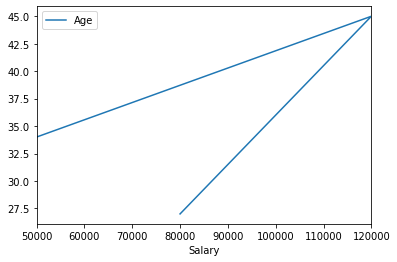

In [126]:
df.plot(x='Salary',y='Age',kind='line')        # VIMP

# <a id='Reading_Real_World_Data_Files'></a>Reading Real World Data Files

1. Reading from a CSV file
2. Reading from a txt file
3. Reading from multiple txt files
4. Exercise

## Reading from a CSV file

In [1]:
import pandas as pd

In [4]:
# Reading data from a CSV file using read_csv()
reviews=pd.read_csv('./Media/data/reviews.csv')

In [5]:
# Printing shape of dataframe
print('Shape=>',reviews.shape)

Shape=> (17494, 5)


In [6]:
# Printing first five rows
reviews.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


## Reading from a txt file

In [7]:
# Reading text file in read mode as a file object using open()
file=open('./Media/data/film.txt',mode='r',encoding='utf-8')

In [8]:
# Getting text data as string from file object using read()
text=file.read()

In [9]:
# Closing the file using close()
file.close()

In [10]:
print(text)

Sammo Hung's 1989 film Pedicab Driver is considered by many to be his masterpiece. I have to agree to some extent as the film in its greatest parts really gets as incredible and fantastic as any Hong Kong film ever has. It is a combination of pretty good and well written drama, interesting and sympathetic (and also non-sympathetic) characters, some genuinely funny humor and truly over-the-top hyper kung fu that is guaranteed to make many jaws drop when someone not familiar with Hong Kong cinema watches the film as well as it does to the experienced enthusiasts of the unique industry.

<br /><br />

Sammo and Max Mok Siu Chung play two pedicab drivers who live in Hong Kong in the middle part of the last century, I think. They drive their cabs and are also desperate for love. Sammo is interested in local baker girl Ping (Nina Li Chi) while Max one day meets a mysterious and beautiful Fennie Yuen Kit-Ying he falls madly in love with. Many other characters get introduced, too, and they rem

## Reading from multiple txt files

In [11]:
import os

In [13]:
# Getting list of all files in the folder
file_names=os.listdir(path='./Media/data/dataset/')

In [14]:
len(file_names)

12500

In [15]:
file_names[:5]

['0_9.txt', '10000_8.txt', '10001_10.txt', '10002_7.txt', '10003_8.txt']

In [17]:
files=[]

# Filling the list with text data from all the files
for file_name in file_names:
    file=open('./Media/data/dataset/'+file_name,mode='r',encoding='utf-8')
    text=file.read()
    file.close()
    
    # Appending data to the list
    files.append(text)

In [18]:
# Creating dataframe from the list
df=pd.DataFrame(files,columns=['text'])

In [19]:
# Printing shape of dataframe
print('Shape=>',df.shape)

Shape=> (12500, 1)


In [20]:
# Printing first five rows
df.head()

,text
0,Bromwell High is a cartoon comedy. It ran at t...
1,Homelessness (or Houselessness as George Carli...
2,Brilliant over-acting by Lesley Ann Warren. Be...
3,This is easily the most underrated film inn th...
4,This is not the typical Mel Brooks film. It wa...


In [21]:
df.to_csv('dataframe.csv',index=False)

## Excercise

Read data from all the txt files, combine them, and convert to a dataframe like the below. The dataframe must contain two columns.



<br>![](./Media/1_191.png)

## Excercise - Solution-1

In [22]:
# Getting list of all files in the folder
files=os.listdir('./Media/data/sentiment labelled sentences/')

files

['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']

In [24]:
lines=[]

# Reading all the lines from the txt files
for i in files:
    temp_file=open('./Media/data/sentiment labelled sentences/'+i,mode='r',encoding='utf-8')
    temp=temp_file.readlines()
    lines.extend(temp)

In [25]:
len(lines)

3000

In [26]:
# Lines from the text files
lines[:10]

['So there is no way for me to plug it in here in the US unless I go by a converter.\t0\n',
 'Good case, Excellent value.\t1\n',
 'Great for the jawbone.\t1\n',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\n',
 'The mic is great.\t1\n',
 'I have to jiggle the plug to get it to line up right to get decent volume.\t0\n',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0\n',
 'If you are Razr owner...you must have this!\t1\n',
 'Needless to say, I wasted my money.\t0\n',
 'What a waste of money and time!.\t0\n']

In [27]:
# Label
lines[0][-2]

'0'

In [28]:
# Sentence
lines[0][:-3]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [29]:
# Extracting sentences and labels from lines
sentences=[]
labels=[]

for i in lines:
    sentences.append(i[:-3])
    labels.append(int(i[-2]))

In [30]:
# First 10 sentences
sentences[:10]

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.',
 'Great for the jawbone.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'The mic is great.',
 'I have to jiggle the plug to get it to line up right to get decent volume.',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
 'If you are Razr owner...you must have this!',
 'Needless to say, I wasted my money.',
 'What a waste of money and time!.']

In [31]:
# First 10 labels
labels[:10]

[0, 1, 1, 0, 1, 0, 0, 1, 0, 0]

In [32]:
# Creating a dataframe
df=pd.DataFrame({
    'reviews':sentences,
    'label':labels
})

In [33]:
# Printing shape of dataframe
print('Shape=>',df.shape)

Shape=> (3000, 2)


In [34]:
df.head()

,reviews,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


## Excercise - Solution-2

In [35]:
# Getting list of all files in the folder
files=os.listdir('./Media/data/sentiment labelled sentences/')

files

['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']

In [36]:
# Creating an Empty dataframe
df=pd.DataFrame(columns=['reviews','label'])

In [38]:
# Iterating through all the files
for i in files:
    # Creating a temporary dataframe
    temp=pd.read_csv('./Media/data/sentiment labelled sentences/'+i,sep='\t',names=['reviews','label'],quoting=3)
    
    # Concatinating temporary dataframe with df
    df=pd.concat([df,temp],axis='index',ignore_index=True) # df=pd.concat([df,temp],axis=0,ignore_index=True)

In [39]:
# Printing shape of dataframe
print('Shape=>',df.shape)

Shape=> (3000, 2)


In [40]:
df.head()

,reviews,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


# <a id='Data_Manipulation_with_Pandas'></a>Data Manipulation with Pandas

Pandas is the most widely used library of python for data science. It is incredibly helpful in manipulating the data so that you can derive better insights and build great machine learning models.

In this notebook, we will have a look at some of the intermediate concepts of working with pandas.


## Table of Contents

1. Sorting dataframes
2. Merging dataframes

### Loading dataset

***In this notebook we will use the Big Mart Sales Data. You can download the data from : https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/download/train-file*** 

In [2]:
import pandas as pd
import numpy as np

# read the dataset
data_BM = pd.read_csv('./Media/data/bigmart_data.csv')
# drop the null values
data_BM = data_BM.dropna(how="any")
# view the top results
data_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


### 1. Sorting dataframes

Pandas data frame has two useful functions

- **sort_values()**: to sort pandas data frame by one or more columns
- **sort_index()**: to sort pandas data frame by row index

Each of these functions come with numerous options, like sorting the data frame in specific order (ascending or descending), sorting in place, sorting with missing values, sorting by specific algorithm etc.

Suppose you want to sort the dataframe by "Outlet_Establishment_Year" then you will use **sort_values**

In [3]:
# sort by year
sorted_data = data_BM.sort_values(by='Outlet_Establishment_Year')
# print sorted data
sorted_data[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2812,FDR60,14.30,Low Fat,0.130307,Baking Goods,75.7328,OUT013,1987,High,Tier 3,Supermarket Type1,617.8624
5938,NCJ06,20.10,Low Fat,0.034624,Household,118.9782,OUT013,1987,High,Tier 3,Supermarket Type1,1549.3166
3867,FDY38,13.60,Regular,0.119077,Dairy,231.2300,OUT013,1987,High,Tier 3,Supermarket Type1,2330.3000
1307,FDB37,20.25,Regular,0.022922,Baking Goods,240.7538,OUT013,1987,High,Tier 3,Supermarket Type1,3364.9532
5930,NCA18,10.10,Low Fat,0.056031,Household,115.1492,OUT013,1987,High,Tier 3,Supermarket Type1,1737.7380


- Now `sort_values` takes multiple options like:
    - `ascending`: The default sorting order is ascending, when you pass False here then it sorts in descending order.
    - `inplace`: whether to do inplace sorting or not

In [4]:
# sort in place and descending order
data_BM.sort_values(by='Outlet_Establishment_Year', ascending=False, inplace=True)
data_BM[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2825,FDL16,12.85,Low Fat,0.169139,Frozen Foods,46.4060,OUT018,2009,Medium,Tier 3,Supermarket Type2,186.4240
7389,NCD42,16.50,Low Fat,0.012689,Health and Hygiene,39.7506,OUT018,2009,Medium,Tier 3,Supermarket Type2,227.7036
2165,DRJ39,20.25,Low Fat,0.036474,Dairy,218.3482,OUT018,2009,Medium,Tier 3,Supermarket Type2,2409.5302
2162,FDR60,14.30,Low Fat,0.130946,Baking Goods,76.7328,OUT018,2009,Medium,Tier 3,Supermarket Type2,1312.9576
2158,FDM58,16.85,Regular,0.080015,Snack Foods,111.8544,OUT018,2009,Medium,Tier 3,Supermarket Type2,1677.8160


You might want to sort a data frame based on the values of multiple columns. 
We can specify the columns we want to sort by as a list in the argument for sort_values().


In [6]:
# read the dataset
data_BM = pd.read_csv('./Media/data/bigmart_data.csv')
# drop the null values
data_BM = data_BM.dropna(how="any")

# sort by multiple columns
data_BM.sort_values(by=['Outlet_Establishment_Year', 'Item_Outlet_Sales'], ascending=False)[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
2803,FDU51,20.20,Regular,0.096907,Meat,175.5028,OUT018,2009,Medium,Tier 3,Supermarket Type2,6729.9064
641,FDY51,12.50,Low Fat,0.081465,Meat,220.7798,OUT018,2009,Medium,Tier 3,Supermarket Type2,6611.3940
2282,NCX30,16.70,Low Fat,0.026729,Household,248.4776,OUT018,2009,Medium,Tier 3,Supermarket Type2,6439.6176
2887,FDR25,17.00,Regular,0.140090,Canned,265.1884,OUT018,2009,Medium,Tier 3,Supermarket Type2,6359.7216


- Note that when sorting by multiple columns, pandas sort_value() uses the first variable first and second variable next. 
- We can see the difference by switching the order of column names in the list.

In [7]:
# changed the order of columns
data_BM.sort_values(by=['Item_Outlet_Sales', 'Outlet_Establishment_Year'], ascending=False, inplace=True)
data_BM[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4888,FDF39,14.850,Regular,0.019495,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.6490
4289,NCM05,6.825,Low Fat,0.059847,Health and Hygiene,262.5226,OUT046,1997,Small,Tier 1,Supermarket Type1,9779.9362
6409,FDA21,13.650,Low Fat,0.035931,Snack Foods,184.4924,OUT013,1987,High,Tier 3,Supermarket Type1,9069.5276
4991,NCQ53,17.600,Low Fat,0.018905,Health and Hygiene,234.6590,OUT046,1997,Small,Tier 1,Supermarket Type1,8508.9240
5752,FDI15,13.800,Low Fat,0.141326,Dairy,265.0884,OUT035,2004,Small,Tier 2,Supermarket Type1,8479.6288


- We can use **sort_index()** to sort pandas dataframe to sort by row index or names. 
- In this example, row index are numbers and in the earlier example we sorted data frame by 'Item_Outlet_Sales', 'Outlet_Establishment_Year' and therefore the row index are jumbled up. 
- We can sort by row index (with inplace=True option) and retrieve the original dataframe.

In [8]:
# sort by index
data_BM.sort_index(inplace=True)
data_BM[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


### 2. Merging dataframes

- Joining and merging DataFrames is the core process to start with data analysis and machine learning tasks. 
- It is one of the toolkits which every Data Analyst or Data Scientist should master because in almost all the cases data comes from multiple source and files.
- Pandas has two useful functions for merging dataframes:
    - **concat()**
    - **merge()** 
    
#### Creating dummy data

In [10]:
# create dummy data
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'C': ['C0', 'C1', 'C2', 'C3'],
                     'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
 

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                     'B': ['B4', 'B5', 'B6', 'B7'],
                     'C': ['C4', 'C5', 'C6', 'C7'],
                     'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])
 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                     'B': ['B8', 'B9', 'B10', 'B11'],
                     'C': ['C8', 'C9', 'C10', 'C11'],
                     'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])

### a. concat() for combining dataframes
- Suppose you have the following three dataframes: df1, df2 and df3 and you want to combine them **"row-wise"** so that they become a single dataframe like the given image:
<br>![](./Media/concat_1_a.png)
- You can use **concat()** here. You will have to pass the names of the DataFrames in a list as the argument to the concat(). 

In [11]:
# combine dataframes
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


- pandas also provides you with an option to label the DataFrames, after the concatenation, with a key so that you may know which data came from which DataFrame.
- You can achieve the same by passing additional argument **keys** specifying the label names of the DataFrames in a list.

In [12]:
# combine dataframes
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

- Mentioning the keys also makes it easy to retrieve data corresponding to a particular DataFrame. 
- You can retrieve the data of DataFrame df2 which had the label `y` by using the `loc` method.

In [13]:
# get second dataframe
result.loc['y']

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


- When gluing together multiple DataFrames, you have a choice of how to handle the other axes (other than the one being concatenated). This can be done in the following three ways:

    - Take the union of them all, `join='outer'`. This is the default option as it results in zero information loss.
    - Take the intersection, `join='inner'`.
    - Use a specific index, as passed to the `join_axes` argument.

- Here is an example of each of these methods. First, the default `join='outer'` behavior:
<br>![](./Media/concat_2.png)

In [20]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                        'D': ['D2', 'D3', 'D6', 'D7'],
                        'F': ['F2', 'F3', 'F6', 'F7']},
                       index=[2, 3, 6, 7])
    

result = pd.concat([df1, df4], axis='columns', sort=False)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


- Here is the same thing with `join='inner'`:
<br>![](./Media/concat_3.png)

In [21]:
result = pd.concat([df1, df4], axis='columns', join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


- Lastly, suppose we just wanted to `reuse the exact index` from the original DataFrame:
<br>![](./Media/concat_4.png)

In [27]:
result = pd.concat([df1, df4], axis='columns') # pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


### b. merge() for combining dataframes using SQL like joins

- Another ubiquitous operation related to DataFrames is the merging operation. 
- Two DataFrames might hold different kinds of information about the same entity and linked by some common feature/column.
- We can use **merge()** to combine such dataframes in pandas.

#### Creating dummy data

In [28]:
# create dummy data
df_a = pd.DataFrame({
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']})

df_b = pd.DataFrame({
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']})

df_c = pd.DataFrame({
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]})

Now these are our dataframes:
<br>![](./Media/merge_4.png)

- Let's start with a basic join, we want to combine `df_a` with `df_c` based on the `subject_id` column.

In [29]:
pd.merge(df_a, df_c, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,5,Ayoung,Atiches,16


- Now that we have done a basic join, let's get into **some commmon SQL joins.**

#### Merge with outer join

- “Full outer join produces the set of all records in Table A and Table B, with matching records from both sides where available. If there is no match, the missing side will contain null.”
<br>![](./Media/merge_8.png)


In [30]:
pd.merge(df_a, df_b, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


#### Merge with inner join

- “Inner join produces only the set of records that match in both Table A and Table B.”
<br>![](./Media/merge_5.png)

In [31]:
pd.merge(df_a, df_b, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


#### Merge with right join

- “Right outer join produces a complete set of records from Table B, with the matching records (where available) in Table A. If there is no match, the left side will contain null.”

<br>![](./Media/merge_7.png)

In [32]:
pd.merge(df_a, df_b, on='subject_id', how='right')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black
2,6,NaN,NaN,Bran,Balwner
3,7,NaN,NaN,Bryce,Brice
4,8,NaN,NaN,Betty,Btisan


#### Merge with left join

- “Left outer join produces a complete set of records from Table A, with the matching records (where available) in Table B. If there is no match, the right side will contain null.”
<br>![](./Media/merge_6.png)

In [34]:
pd.merge(df_a, df_b, on='subject_id', how='left')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black


### Merge OR Concat : Which to use when?

1. After learning both of the functions in detail, chances are that you might be confused which to use when. 
2. One major difference is that `merge()` is used to combine dataframes on the basis of values of **common columns**. While`concat()` is used to **append dataframes** one below the other (or sideways, depending on whether the axis option is set to 0 or 1).
3. Exact usage depends upon the kind of data you have and analysis you want to perform.